In [26]:
# Setting up a custom stylesheet in IJulia
file = open("style.css") # A .css file in the same folder as this notebook file
styl = read(file, String) # Read the file
HTML("$styl") # Output as HTML

HTML{String}("<link href='http://fonts.googleapis.com/css?family=Alegreya+Sans:100,300,400,500,700,800,900,100italic,300italic,400italic,500italic,700italic,800italic,900italic' rel='stylesheet' type='text/css'>\n<link href='http://fonts.googleapis.com/css?family=Arvo:400,700,400italic' rel='stylesheet' type='text/css'>\n<link href='http://fonts.googleapis.com/css?family=PT+Mono' rel='stylesheet' type='text/css'>\n<link href='http://fonts.googleapis.com/css?family=Shadows+Into+Light' rel='stylesheet' type='text/css'>\n<link href='http://fonts.googleapis.com/css?family=Philosopher:400,700,400italic,700italic' rel='stylesheet' type='text/css'>\n\n<style>\n\n@font-face {\n    font-family: \"Computer Modern\";\n    src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');\n}\n\n#notebook_panel { /* main background */\n    background: #ddd;\n    color: #000000;\n}\n\n\n\n/* Formatting for header cells */\n.text_cell_render h1 {\n    font-family: 'Philosopher', sans-serif;\n    font-weight: 400;\n    font-size: 2.2em;\n    line-height: 100%;\n    color: rgb(0, 80, 120);\n    margin-bottom: 0.1em;\n    margin-top: 0.1em;\n    display: block;\n}\t\n.text_cell_render h2 {\n    font-family: 'Philosopher', serif;\n    font-weight: 400;\n    font-size: 1.9em;\n    line-height: 100%;\n    color: rgb(200,100,0);\n    margin-bottom: 0.1em;\n    margin-top: 0.1em;\n    display: block;\n}\t\n\n.text_cell_render h3 {\n    font-family: 'Philosopher', serif;\n    margin-top:12px;\n    margin-bottom: 3px;\n    font-style: italic;\n    color: rgb(94,127,192);\n}\n\n.text_cell_render h4 {\n    font-family: 'Philosopher', serif;\n}\n\n.text_cell_render h5 {\n    font-family: 'Alegreya Sans', sans-serif;\n    font-weight: 300;\n    font-size: 16pt;\n    color: grey;\n    font-style: italic;\n    margin-bottom: .1em;\n    margin-top: 0.1em;\n    display: block;\n}\n\n.text_cell_render h6 {\n    font-family: 'PT Mono', sans-serif;\n    font-weight: 300;\n    font-size: 10pt;\n    color: grey;\n    margin-bottom: 1px;\n    margin-top: 1px;\n}\n\n.CodeMirror{\n        font-family: \"PT Mono\";\n        font-size: 100%;\n}\n\n</style>\n\n")

# Data

<h2>In this lesson</h2>

- [Introduction](#Introduction)
- [Importing the packages for this lesson](#Importing-the-packages-for-this-lesson)
- [Outcome](#Outcome)
- [The standard normal distribution](#The-standard-normal-distribution)
- [Using the Distributions package](#Using-the-Distributions-package)
- [Comparing samples](#Comparing-samples)
- [Plotly](#Plotly)

<hr>
<h2>Introduction</h2>

Data is everywhere and working with data is very important in scientific computing.  Data point values come in patterns, called distributions.  Whether you are modelling, getting data from a research project, or simply want ot manufactor some data, Julia is the place to go.

We know about the `rand()` and `randn()` functions, but by using the `Distributions` package we can do much, much more.

[Back to the top](#In-this-lesson)

<hr>
<h2>Importing the packages for this lesson</h2>

In [27]:
using Distributions

You should have the `PlotlyJS` package installed.

In [28]:
using Plots
plotlyjs()

ArgumentError: ArgumentError: Package ORCA not found in current path:
- Run `import Pkg; Pkg.add("ORCA")` to install the ORCA package.


In [29]:
using StatPlots

In [30]:
using HypothesisTests

In [31]:
using DataFrames

In [32]:
using GLM

<hr>
<h2>Outcome</h2>

After successfully completing this lecture, you will be able to:

- Understand and plot the standard normal distribution
- Create a variety of random value from different distributions using the `Distributions` package
- Plot some of the distributions in the `Distributions` package
- Create your own data using a distribution and its parameters
- Use the online plotting library `Plotly`

<hr>
<h2>The standard normal distribution</h2>

The Julie function `rand()` allows us to return an array of randomly selected values.  The values come from a specific distribution, namely the **standard normal** distribution.  The majority of values cluster around the mean of $ 0 $ and a standard deviation of $ 1 $.  Let's get $ 1000 $ such values and attach this array to the variable `norm1`.

In [33]:
# We will put a semicolon at the end to supress the output
norm1 = randn(1000);

We can plot this as histogram.  In the example below, we will use the keyword argument `bins`.  Setting it to $ 10 $ means that between the minimum and maximum value we create $ 10 $ equally sized ranges and count how many values occur in each range.

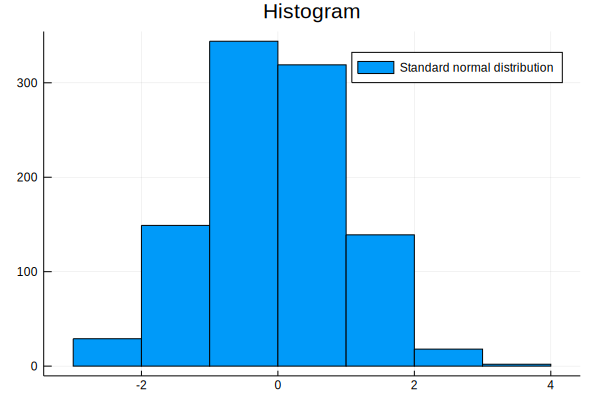

In [34]:
# Beware the pink text box!!!
histogram(norm1, bins = 10, label = "Standard normal distribution",
title = "Histogram")

These values were selected at random.  We can check how close we came to a real mean of $ 0 $ and a standard deviation of $ 1 $.

In [35]:
# Using mean()
mean(norm1)

-0.040640196163584774

In [36]:
# Standard deviation using std()
std(norm1)

1.0219890956957254

[Back to the top](#In-this-lesson)

<hr>
<h2>Using the Distributions package</h2>

We can ask for random data point values for a variable to be taken from any number of discrete or continuous distributions.  This greatly expands on the standard normal distribution provided by the `randn()` function.  In this lesson we will concentrate on the continuous random variables and start with the normal distribution.

### The normal distribution

The `Normal()` function from the Distribution package takes two arguments.  The first is the mean and the second is the required standard deviation.  We use it in conjunction with the `rand()` function so that we can specifiy how many data point values we want.

In [37]:
# Recreating the standard normal distribution
norm2 = rand(Normal(0, 1), 1000);

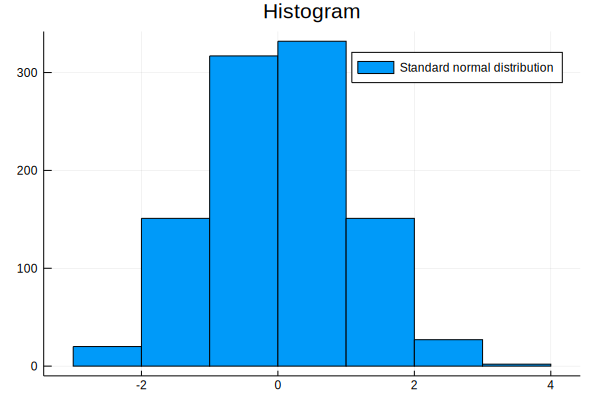

In [38]:
# Histogram
histogram(norm2, bins = 10, label = "Standard normal distribution",
title = "Histogram")

Just to belabor the point, we can use `Plots` to show us the theoretical normal distribution.

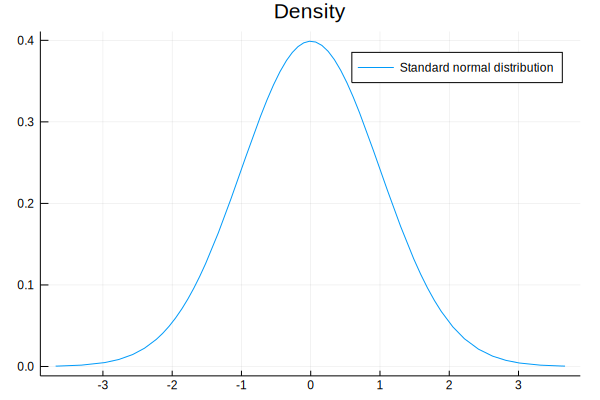

In [39]:
plot(Normal(0, 1), fill = (0.5, :blue), label = "Standard normal distribution",
title = "Density")

We can also fit some data to a distribution.  In the example below we use the `norm1` array and fit it to the standard normal distribution.

In [40]:
fit(Normal, norm1)

Normal{Float64}(μ=-0.040640196163584774, σ=1.0214779733353267)

We can plot other distributions as well.  Here is the $ {\chi}^{2} $ distribution with different degrees of freedom.

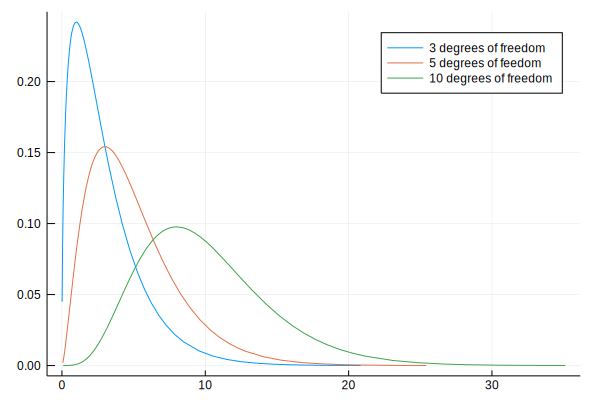

In [41]:
plot(Chisq(3), fill = (0.25, :blue), label = "3 degrees of freedom")
plot!(Chisq(5), fill = (0.25, :orange), label = "5 degrees of feedom")
plot!(Chisq(10), fill = (0.25, :deepskyblue), label = "10 degrees of freedom")

The exponential distribution with scale parameter $ \theta $.

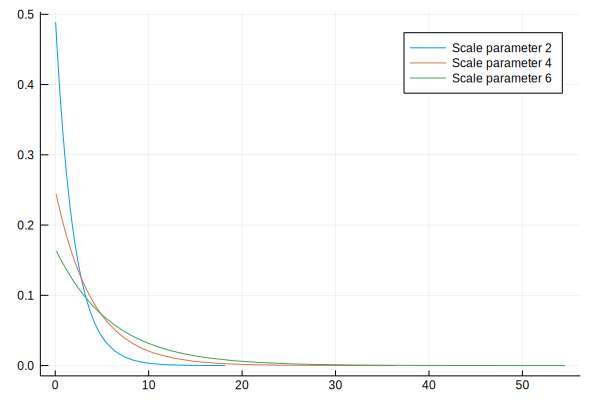

In [42]:
plot(Exponential(2), fill = (0.25, :blue), label = "Scale parameter 2")
plot!(Exponential(4), fill = (0.25, :orange), label = "Scale parameter 4")
plot!(Exponential(6), fill = (0.25, :deepskyblue), label = "Scale parameter 6")

[Back to the top](#In-this-lesson)

<hr>
<h2>Comparing samples</h2>

The reason for the detour to a quick peek into the distributions package, is that we want to create arrays of data point values or elements that are picked at random, each drawn from a specific distribution.

So, imagine that we compare the results of two sets of experiments or observed outcomes.  These can take on many, many form.  We have seen data from an Ebola epidemic, but we can consider a lot more.  Let's keep it simple and consider the examination results of a particular course.  Imagine that we have the results of two consecutive years.  Our aim is to learn how to use Julia.  So, we don't need actual results.  We can simply simulate some results.  You can well imagine that these values can be stored as arrays!

If $ 100 $ students take the examination each year, we can use the `rand()` function to generate random values.  As argument, though, we pass a specific distribution.  We'll use the normal distribution with a mean and a standard deviation.

In [43]:
year1 = rand(Normal(67, 10), 100)
year2 = rand(Normal(71, 15), 100);

Our aim will be to compare these.  The average scored for each year differs.  Are they statistically different, though?  This is not a course in statistics, but using Julia, we'll see how easy it is to tell us if there is such a difference.

For now, let's plot the examination results as theoretical distributions.

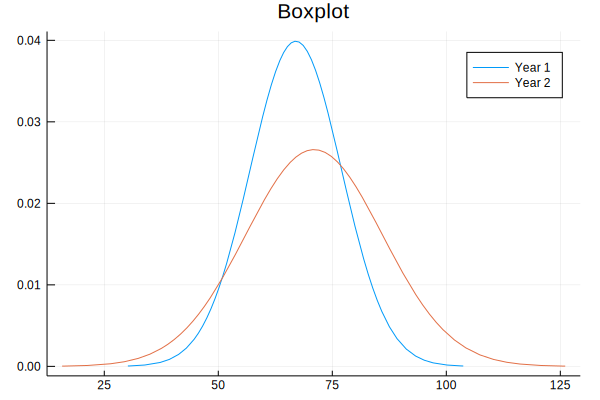

In [44]:
plot(Normal(67, 10), fill = (0.5, :orange), label = "Year 1", title = "Boxplot")
plot!(Normal(71, 15), fill = (0.5, :blue), label = "Year 2")

We can get more statistical information from these two distributions.

In [45]:
# Skewness
skewness(year1), skewness(year2)

(0.012254595127613425, -0.2570627392015165)

In [46]:
# Kurtosis
kurtosis(year1), kurtosis(year2)

(-0.691049733117342, 0.15082836878326988)

Now let's compare these two year by way of Student's *t*-test.

In [47]:
EqualVarianceTTest(year1, year2)

Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          -4.333483297135572
    95% confidence interval: (-7.8862, -0.7808)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0171

Details:
    number of observations:   [100,100]
    t-statistic:              -2.4054329360197086
    degrees of freedom:       198
    empirical standard error: 1.8015398526579693


Imagine instead that these were the same students going on from year $ 1 $ to year $ 2 $.  We want to know if there is a correlation between the marks in the two years.

In [48]:
data = DataFrame(One = year1, Two = year2)

,One,Two
,Float64,Float64
1,60.6026,87.4871
2,76.7933,86.5613
3,74.7411,87.817
4,81.4497,55.7688
5,62.0348,64.8682
6,66.8692,89.2371
7,67.233,79.0529
8,57.0687,60.1498
9,50.2655,62.7046


In [49]:
OLS = glm(One ~ Two, data, Normal(), IdentityLink())

UndefVarError: UndefVarError: One not defined

[Back to the top](#In-this-lesson)

## Plotly

Plotly is a collabrotaive / social website for plotting.  Let's have a look.

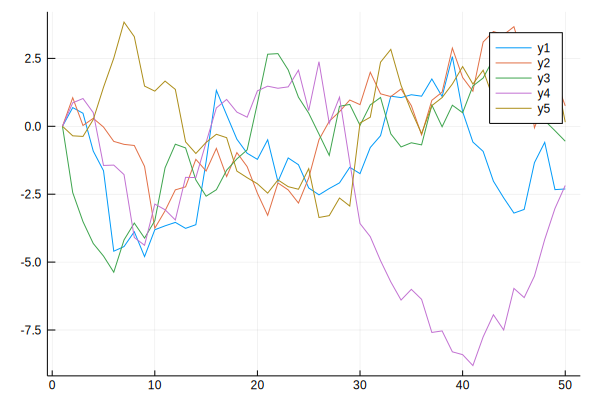

In [50]:
plot(Plots.fakedata(50, 5), w = 1)

[Back to the top](#In-this-lesson)